In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_fn='Yadkin_Creek.xlsx'

In [9]:
df=pd.read_excel(data_fn)

In [10]:
df2=pd.to_datetime(df[['year', 'month', 'day']])
df['time']=df2.values

In [11]:
df.head()

,year,month,day,Observed Runoff,Precipitation,Tmax,Tmin,Wind Speed,time
0,1950,6,1,2.47746,0.2576,30.6099,16.2888,0.8423,1950-06-01
1,1950,6,2,1.96266,5.4579,30.4237,18.1539,1.7568,1950-06-02
2,1950,6,3,1.96266,6.0343,28.3606,18.8719,2.1001,1950-06-03
3,1950,6,4,2.09136,10.5958,27.1970,18.6615,2.9097,1950-06-04
4,1950,6,5,1.89831,2.9596,24.1668,13.9388,1.0753,1950-06-05


In [23]:
def Runoff_Calc(df,initialQ,t):
    s='Q_'+str(t)
    df[s]=''
    df.loc[0,s]=df.loc[0,'Precipitation ']+(initialQ-df.loc[0,'Precipitation '])*np.exp(-1/t)
    for i in range(1,len(df)):
        df.loc[i,s]=df.loc[i,'Precipitation ']+(df.loc[i-1,s]-df.loc[i,'Precipitation '])*np.exp(-1/t)
    
    return df

In [182]:
def plot_fig(df,col1,col2,ylabel):
    fig=plt.figure()
    plt.plot(df.time,df[col1], color='red',label=col1)
    plt.plot(df.time,df[col2], color='green',label=col2)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.axhline(y=0)
    plt.legend()
    return fig

In [50]:
def calibarate_func(df,t,initialQ):
    df['cal']=''
    df.loc[0,'cal']=df.loc[0,'Precipitation ']+(initialQ-df.loc[0,'Precipitation '])*np.exp(-1/t)
    for i in range(1,len(df)):
        df.loc[i,'cal']=df.loc[i,'Precipitation ']+(df.loc[i-1,'cal']-df.loc[i,'Precipitation '])*np.exp(-1/t)
    figure=plot_fig(df,'Observed Runoff','cal','Runoff (mm/day)')    
    return df,figure

#### Assumption, initial Q=0

In [24]:
df_4=Runoff_Calc(df,1.5,4)
df_20=Runoff_Calc(df,1.5,20)

In [25]:
df_20.head()

,year,month,day,Observed Runoff,Precipitation,Tmax,Tmin,Wind Speed,time,Q_4,Q_20
0,1950,6,1,2.47746,0.2576,30.6099,16.2888,0.8423,1950-06-01,1.22518,1.43941
1,1950,6,2,1.96266,5.4579,30.4237,18.1539,1.7568,1950-06-02,2.16146,1.63539
2,1950,6,3,1.96266,6.0343,28.3606,18.8719,2.1001,1950-06-03,3.01813,1.84993
3,1950,6,4,2.09136,10.5958,27.1970,18.6615,2.9097,1950-06-04,4.6943,2.27647
4,1950,6,5,1.89831,2.9596,24.1668,13.9388,1.0753,1950-06-05,4.31059,2.30979


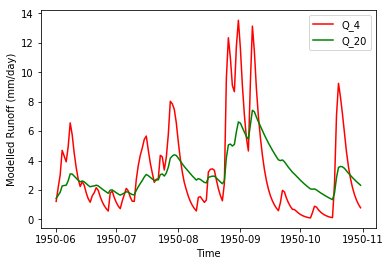

In [35]:
figure=plot_fig(df_20,'Q_4','Q_20','Modelled Runoff (mm/day)')

In [36]:
figure.savefig('1a.png', format='png', dpi=300)

In [28]:
df['Storage_4']=df.Q_4*4
df['Storage_20']=df.Q_20*20
mean_storage_4=df['Storage_4'].mean()
mean_storage_20=df['Storage_20'].mean()

In [29]:
mean_storage_4

13.146652341335653

In [30]:
mean_storage_20

63.305244654877704

In [37]:
mean_precip=df['Precipitation '].mean()

In [38]:
mean_precip

3.270408496732026

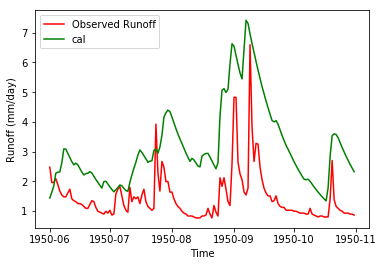

In [88]:
cal_df,figure1=calibarate_func(df_20,20,1.5)

In [59]:
figure1.savefig('1a_1.png',dpi=300,format='png')

## 1b) Evapotranspiration from inital reservoir model

### Assumption:- Change in amount of water stored is zero
#### ET=P-R

In [96]:
def func_uet(mp,mr,met,ci):
    if ci==95:
        z=1.96
    elif ci==90:
        z=1.643
    print(z)
    sigmap=(0.1*mp)/z
    sigmar=(0.05*mr)/z
    sigma_et=np.sqrt((sigmap**2)+(sigmar**2))
    uet=(z*sigma_et)/met
    et_max=met+(met*uet)
    et_min=met-(met*uet)
    print(sigmap)
    #print(sigma_et)
    print(uet)
    print(et_min)
    print(et_max)
    return uet,et_max,et_min

##### For T*=4

In [97]:
#95% Confidence interval
mean_runoff_4=df_20['Q_4'].mean()
mean_ET_4=mean_precip-mean_runoff_4
print(mean_runoff_4)
print(mean_ET_4)
uet_4,et_max_4,et_min_4=func_uet(mean_precip,mean_runoff_4,mean_ET_4,95)


3.286663085333913
-0.01625458860188722
1.96
0.1668575763638789
-22.517147627415802
-0.382261559773492
0.3497523825697176


In [98]:
#90% Confidence interval
mean_runoff_4=df_20['Q_4'].mean()
mean_ET_4=mean_precip-mean_runoff_4
print(mean_runoff_4)
print(mean_ET_4)
uet_4,et_max_4,et_min_4=func_uet(mean_precip,mean_runoff_4,mean_ET_4,90)


3.286663085333913
-0.01625458860188722
1.643
0.19905103449373257
-22.5171476274158
-0.38226155977349197
0.3497523825697175


##### For T*=20

In [78]:
#95% Confidence_Interval
mean_runoff_20=df_20['Q_20'].mean()
mean_ET_20=mean_precip-mean_runoff_20
print(mean_runoff_20)
print(mean_ET_20)
uet_20,et_max_20,et_min_20=func_uet(mean_precip,mean_runoff_20,mean_ET_20,95)

3.1652622327438853
0.10514626398814064
3.455396899289775
-0.2581758105683847
0.46846833854466596


In [79]:
#90% Confidence_Interval
mean_runoff_20=df_20['Q_20'].mean()
mean_ET_20=mean_precip-mean_runoff_20
print(mean_runoff_20)
print(mean_ET_20)
uet_20,et_max_20,et_min_20=func_uet(mean_precip,mean_runoff_20,mean_ET_20,90)

3.1652622327438853
0.10514626398814064
3.4553968992897746
-0.2581758105683846
0.4684683385446659


##### Observed Runoff

In [95]:
#95% Confidence_Interval
mean_runoff=df_20['Observed Runoff'].mean()
mean_ET=mean_precip-mean_runoff
print(mean_runoff)
print(mean_ET)
uet,et_max,et_min=func_uet(mean_precip,mean_runoff,mean_ET,95)

1.461324522875817
1.809083973856209
0.1668575763638789
0.18523382945924258
1.473980421565479
2.144187526146939


In [94]:
#95% Confidence_Interval
mean_runoff=df_20['Observed Runoff'].mean()
mean_ET=mean_precip-mean_runoff
print(mean_runoff)
print(mean_ET)
uet,et_max,et_min=func_uet(mean_precip,mean_runoff,mean_ET,90)

1.461324522875817
1.809083973856209
0.19905103449373257
0.18523382945924252
1.4739804215654793
2.144187526146939


### 1c.) Linear reservoir Model using additional losses

In [99]:
df['I']=df['Precipitation ']-mean_ET

In [100]:
df.head()

,year,month,day,Observed Runoff,Precipitation,Tmax,Tmin,Wind Speed,time,Q_4,Q_20,Storage_4,Storage_20,cal,I
0,1950,6,1,2.47746,0.2576,30.6099,16.2888,0.8423,1950-06-01,1.22518,1.43941,4.90073,28.7881,1.43941,-1.551484
1,1950,6,2,1.96266,5.4579,30.4237,18.1539,1.7568,1950-06-02,2.16146,1.63539,8.64582,32.7078,1.63539,3.648816
2,1950,6,3,1.96266,6.0343,28.3606,18.8719,2.1001,1950-06-03,3.01813,1.84993,12.0725,36.9986,1.84993,4.225216
3,1950,6,4,2.09136,10.5958,27.1970,18.6615,2.9097,1950-06-04,4.6943,2.27647,18.7772,45.5294,2.27647,8.786716
4,1950,6,5,1.89831,2.9596,24.1668,13.9388,1.0753,1950-06-05,4.31059,2.30979,17.2423,46.1957,2.30979,1.150516


In [101]:
def Runoff_Calc_ET(df,initialQ,t):
    s='Q_'+str(t)
    df[s]=''
    df.loc[0,s]=df.loc[0,'I']+(initialQ-df.loc[0,'I'])*np.exp(-1/t)
    for i in range(1,len(df)):
        df.loc[i,s]=df.loc[i,'I']+(df.loc[i-1,s]-df.loc[i,'I'])*np.exp(-1/t)
    
    return df

In [106]:
df_ET_4=Runoff_Calc_ET(df,0,4)

In [155]:
df_ET_20=Runoff_Calc_ET(df_ET_4,1.5,27)

In [156]:
df_ET_20.head()

,year,month,day,Observed Runoff,Precipitation,Tmax,Tmin,Wind Speed,time,Q_4,...,I,Q_22,Q_24,Q_27,Q_28,Q_30,Q_40,Q_50,Q_25,Q_26
0,1950,6,1,2.47746,0.2576,30.6099,16.2888,0.8423,1950-06-01,0.825014,...,-1.551484,-0.0689432,-0.0633169,1.38905,-0.0544324,1.39996,1.42466,1.43958,1.38035,1.38486
1,1950,6,2,1.96266,5.4579,30.4237,18.1539,1.7568,1950-06-02,1.44964,...,3.648816,0.0962627,0.0881773,1.47121,0.0754926,1.47369,1.47957,1.48332,1.4693,1.47029
2,1950,6,3,1.96266,6.0343,28.3606,18.8719,2.1001,1950-06-03,2.06359,...,4.225216,0.279741,0.257012,1.57135,0.221082,1.56389,1.54736,1.53762,1.57736,1.57423
3,1950,6,4,2.09136,10.5958,27.1970,18.6615,2.9097,1950-06-04,3.55074,...,8.786716,0.657765,0.605114,1.8337,0.521599,1.80068,1.7261,1.68116,1.86004,1.84637
4,1950,6,5,1.89831,2.9596,24.1668,13.9388,1.0753,1950-06-05,3.01981,...,1.150516,0.679661,0.627372,1.80886,0.543664,1.77937,1.71189,1.67065,1.83222,1.82011


In [157]:
print(df_ET_20['Q_4'].min())
print(df_ET_20['Q_27'].min())

-1.7055402360610112
0.01498437243037154


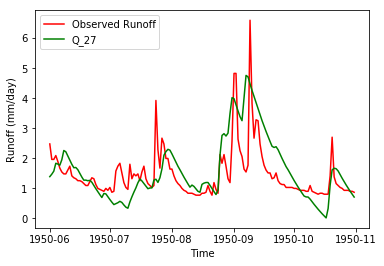

In [159]:
figure3=plot_fig(df_ET_20,'Observed Runoff','Q_27','Runoff (mm/day)')

In [160]:
def calibarate_func_ET(df,t,initialQ):
    df['cal']=''
    df.loc[0,'cal']=df.loc[0,'I']+(initialQ-df.loc[0,'I'])*np.exp(-1/t)
    for i in range(1,len(df)):
        df.loc[i,'cal']=df.loc[i,'I']+(df.loc[i-1,'cal']-df.loc[i,'I'])*np.exp(-1/t)
    figure=plot_fig(df,'Observed Runoff','cal','Runoff (mm/day)')    
    return df,figure

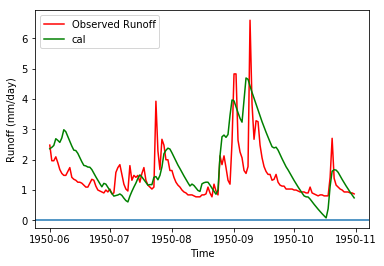

In [194]:
df_cal_ET,figure4=calibarate_func_ET(df_ET_20,28,2.5)

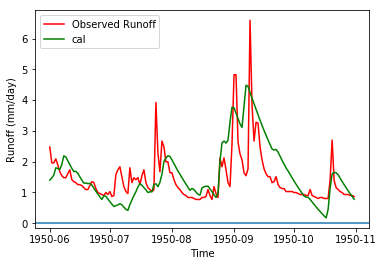

In [201]:
df_cal_ET,figure5=calibarate_func_ET(df_ET_20,30,1.5)

In [198]:
figure4.savefig('1c_1.png',dpi=300,format='png')
figure5.savefig('1c_2.png',dpi=300,format='png')


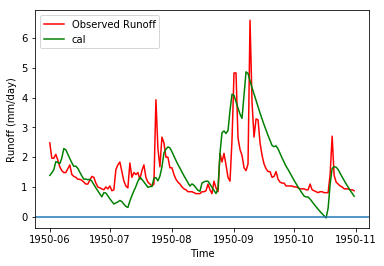

In [209]:
df_cal_ET,figure6=calibarate_func_ET(df_ET_20,26,1.5)

In [210]:
figure6.savefig('1c_3.png',dpi=300,format='png')

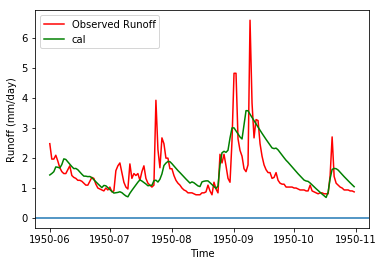

In [207]:
df_cal_ET,figure7=calibarate_func_ET(df_ET_20,45,1.5)

In [211]:
figure7.savefig('1c_4.png',dpi=300,format='png')

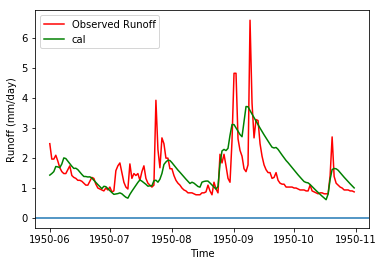

In [212]:
df_cal_ET,figure7=calibarate_func_ET(df_ET_20,42,1.5)

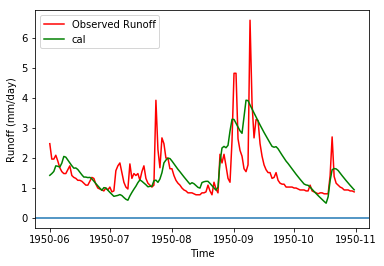

In [214]:
df_cal_ET,figure7=calibarate_func_ET(df_ET_20,38,1.5)